<a href="https://colab.research.google.com/github/MalakAhmed2003/Cellula/blob/main/Cellula_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving satalite data-20250716T212430Z-1-001.zip to satalite data-20250716T212430Z-1-001.zip


In [2]:
import zipfile
import os

# Replace 'your_file.zip' with the actual name of your uploaded zip file
zip_path = "satalite data-20250716T212430Z-1-001.zip"
extract_path = "unzipped_data"

# Create extraction directory (optional)
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")


Extraction complete.


In [3]:
import os
print(os.listdir("unzipped_data"))


['satalite data']


In [6]:
import os
from PIL import Image

# Paths
image_dir = "unzipped_data/satalite data/data/images"
label_dir = "unzipped_data/satalite data/data/labels"

# Get sorted list of files
image_files = sorted(os.listdir(image_dir))
label_files = sorted(os.listdir(label_dir))

# Filter only tif files
image_files = [f for f in image_files if f.endswith('.tif')]
label_files = [f for f in label_files if f.endswith('.png')]

# Print counts for debugging
print(f"Number of image files (.tif): {len(image_files)}")
print(f"Number of label files (.tif): {len(label_files)}")

# Full paths
image_paths = [os.path.join(image_dir, f) for f in image_files]
label_paths = [os.path.join(label_dir, f) for f in label_files]

# Make sure image-label count match
assert len(image_paths) == len(label_paths), "Mismatch between image and label count"

Number of image files (.tif): 306
Number of label files (.tif): 456


AssertionError: Mismatch between image and label count

In [8]:
import os

image_dir = "unzipped_data/satalite data/data/images"
label_dir = "unzipped_data/satalite data/data/labels"

image_paths = []
label_paths = []

for img_file in os.listdir(image_dir):
    if not img_file.endswith('.tif'):
        continue

    base_name = os.path.splitext(img_file)[0]  # e.g., "0"
    label_file = base_name + ".png"            # or base_name + "_mask.png" if needed

    img_path = os.path.join(image_dir, img_file)
    lbl_path = os.path.join(label_dir, label_file)

    if os.path.exists(lbl_path):
        image_paths.append(img_path)
        label_paths.append(lbl_path)
    else:
        print(f"⚠️ No label found for: {img_file}")

print(f"Total matched image-label pairs: {len(image_paths)}")
print(f"Total image paths: {len(image_paths)}")
print(f"Total label paths: {len(label_paths)}")

# Optionally print first few pairs
for i in range(5):
    print(f"{i+1}: Image → {image_paths[i]} | Label → {label_paths[i]}")



Total matched image-label pairs: 306
Total image paths: 306
Total label paths: 306
1: Image → unzipped_data/satalite data/data/images/74.tif | Label → unzipped_data/satalite data/data/labels/74.png
2: Image → unzipped_data/satalite data/data/images/290.tif | Label → unzipped_data/satalite data/data/labels/290.png
3: Image → unzipped_data/satalite data/data/images/296.tif | Label → unzipped_data/satalite data/data/labels/296.png
4: Image → unzipped_data/satalite data/data/images/27.tif | Label → unzipped_data/satalite data/data/labels/27.png
5: Image → unzipped_data/satalite data/data/images/40.tif | Label → unzipped_data/satalite data/data/labels/40.png


In [9]:
from sklearn.model_selection import train_test_split

train_imgs, temp_imgs, train_labels, temp_labels = train_test_split(
    image_paths, label_paths, test_size=0.2, random_state=42)

val_imgs, test_imgs, val_labels, test_labels = train_test_split(
    temp_imgs, temp_labels, test_size=0.5, random_state=42)


In [10]:

# Function to display image and mask side by side
def display_image_and_mask(img_path, mask_path):
    img = Image.open(img_path)
    mask = Image.open(mask_path)

    # Plot the image and the mask side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[0].axis('off')

    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Mask')
    axes[1].axis('off')

    plt.show()


In [14]:
!pip install opencv-python-headless


In [20]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 75.5 MB/s eta 0:00:00


After installing `rasterio`, you can modify the `SatelliteDataset` class and the normalization calculation to use `rasterio.open()` instead of `PIL.Image.open()`.

In [24]:
!pip install tifffile


Image shape: (128, 128, 12), dtype: int16


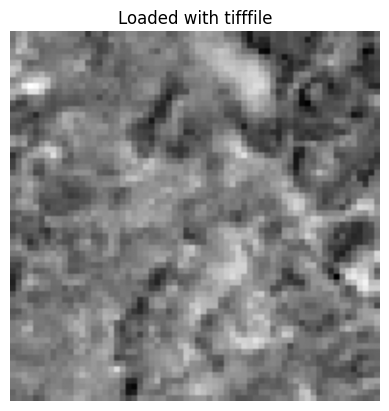

In [25]:
import tifffile as tiff
import matplotlib.pyplot as plt

img_path = 'unzipped_data/satalite data/data/images/58.tif'

try:
    img = tiff.imread(img_path)
    print(f"Image shape: {img.shape}, dtype: {img.dtype}")

    # Display first band or full image
    if img.ndim == 3:
        plt.imshow(img[:, :, 0], cmap='gray')  # Show first band
    else:
        plt.imshow(img, cmap='gray')

    plt.title("Loaded with tifffile")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"❌ Error loading image: {e}")


In [26]:
from PIL import Image

output_dir = "converted_png"
os.makedirs(output_dir, exist_ok=True)

for path in image_paths:
    try:
        img = tiff.imread(path)
        img = (img / img.max() * 255).astype(np.uint8)
        out_path = os.path.join(output_dir, os.path.basename(path).replace(".tif", ".png"))
        Image.fromarray(img).save(out_path)
    except Exception as e:
        print(f"Could not convert {path}: {e}")


Could not convert unzipped_data/satalite data/data/images/74.tif: Cannot handle this data type: (1, 1, 12), |u1
Could not convert unzipped_data/satalite data/data/images/290.tif: Cannot handle this data type: (1, 1, 12), |u1
Could not convert unzipped_data/satalite data/data/images/296.tif: Cannot handle this data type: (1, 1, 12), |u1
Could not convert unzipped_data/satalite data/data/images/27.tif: Cannot handle this data type: (1, 1, 12), |u1
Could not convert unzipped_data/satalite data/data/images/40.tif: Cannot handle this data type: (1, 1, 12), |u1
Could not convert unzipped_data/satalite data/data/images/215.tif: Cannot handle this data type: (1, 1, 12), |u1
Could not convert unzipped_data/satalite data/data/images/280.tif: Cannot handle this data type: (1, 1, 12), |u1
Could not convert unzipped_data/satalite data/data/images/46.tif: Cannot handle this data type: (1, 1, 12), |u1
Could not convert unzipped_data/satalite data/data/images/71.tif: Cannot handle this data type: (1, 

✅ Loaded: shape=(128, 128, 12), dtype=int16


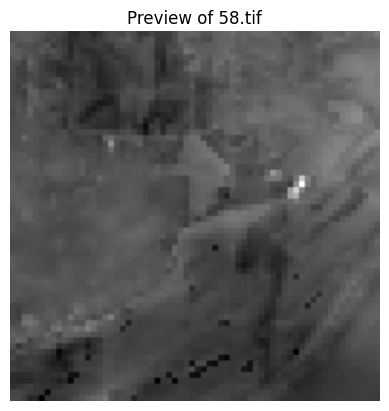

In [28]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

path = "unzipped_data/satalite data/data/images/144.tif"

try:
    img = tiff.imread(path)
    print(f"✅ Loaded: shape={img.shape}, dtype={img.dtype}")

    # Normalize for viewing
    img = img.astype(np.float32)
    img -= img.min()
    img /= img.max() if img.max() > 0 else 1

    plt.imshow(img if img.ndim == 2 else img[..., 0], cmap='gray')
    plt.title("Preview of 58.tif")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"❌ Failed to load: {e}")


In [29]:
import tifffile as tiff
import numpy as np
from tqdm import tqdm
from PIL import Image

def load_and_normalize_tif(path):
    img = tiff.imread(path).astype(np.float32)

    # Normalize to [0, 1]
    img -= img.min()
    if img.max() > 0:
        img /= img.max()

    # Ensure 3D shape: (H, W, C)
    if img.ndim == 2:
        img = np.expand_dims(img, axis=-1)
    return img

def load_and_prepare_dataset_tiff(image_paths, label_paths):
    X = []
    Y = []

    for img_path, lbl_path in tqdm(zip(image_paths, label_paths), total=len(image_paths)):
        try:
            img = load_and_normalize_tif(img_path)
            lbl = np.array(Image.open(lbl_path)).astype(np.int64)

            X.append(img)
            Y.append(lbl)
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")

    return np.array(X), np.array(Y)


In [30]:
X_train, Y_train = load_and_prepare_dataset_tiff(train_imgs, train_labels)
X_val,   Y_val   = load_and_prepare_dataset_tiff(val_imgs, val_labels)
X_test,  Y_test  = load_and_prepare_dataset_tiff(test_imgs, test_labels)

print("Train set:", X_train.shape, Y_train.shape)


100%|██████████| 31/31 [00:00<00:00, 863.17it/s]

Train set: (244, 128, 128, 12) (244, 128, 128)


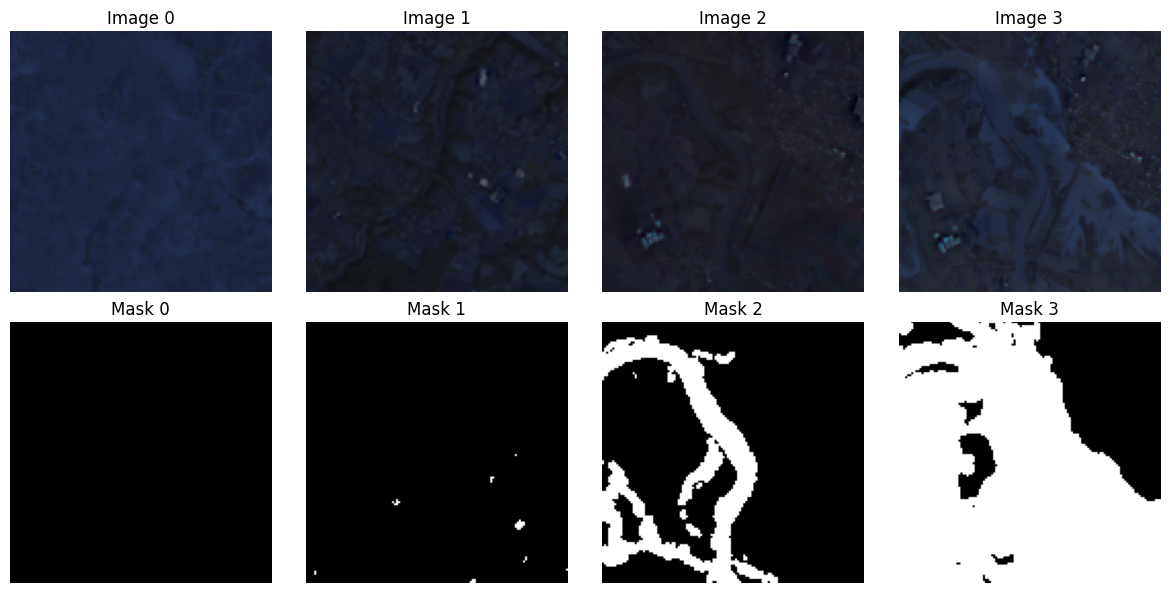

In [32]:
import matplotlib.pyplot as plt

def show_batch(images, masks, num=4):
    plt.figure(figsize=(12, 6))

    for i in range(num):
        # Image
        plt.subplot(2, num, i + 1)
        img = images[i]

        if img.shape[-1] == 1:
            plt.imshow(img[:, :, 0], cmap='gray')
        elif img.shape[-1] >= 3:
            plt.imshow(img[:, :, :3])  # show first 3 bands
        else:
            raise ValueError(f"Image has unsupported shape: {img.shape}")

        plt.title(f"Image {i}")
        plt.axis("off")

        # Mask
        plt.subplot(2, num, i + 1 + num)
        plt.imshow(masks[i], cmap='gray')
        plt.title(f"Mask {i}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Show first 4
show_batch(X_train, Y_train, num=4)


In [40]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import layers, Model, Input


def unet_model(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)


    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

In [36]:
# Example: select bands 3 (R), 2 (G), 1 (B) — adjust based on your data
def reduce_to_rgb(x):
    return x[:, :, [3, 2, 1]]  # or another 3 channels you choose

In [37]:
X_train_rgb = np.array([reduce_to_rgb(img) for img in X_train])
X_val_rgb   = np.array([reduce_to_rgb(img) for img in X_val])
X_test_rgb  = np.array([reduce_to_rgb(img) for img in X_test])

In [58]:
model = unet_model(input_size=(128, 128, 3))  # or (128, 128, 12) if modified

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_rgb, Y_train[..., np.newaxis],  # expand mask to shape (128, 128, 1)
    validation_data=(X_val_rgb, Y_val[..., np.newaxis]),
    epochs=100,
    batch_size=16
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_32']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 617ms/step - accuracy: 0.7470 - loss: 0.6477 - val_accuracy: 0.7016 - val_loss: 0.6704
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.7411 - loss: 0.6036 - val_accuracy: 0.7016 - val_loss: 0.6325
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.7441 - loss: 0.5687 - val_accuracy: 0.7016 - val_loss: 0.5991
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.7524 - loss: 0.5636 - val_accuracy: 0.7016 - val_loss: 0.5781
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.7385 - loss: 0.5517 - val_accuracy: 0.7016 - val_loss: 0.5745
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.7693 - loss: 0.5422 - val_accuracy: 0.7016 - val_loss: 0.5771
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.7418 - loss: 0.5476 - val_accuracy: 0.7016 - val_loss: 0.5755
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.7583 - loss: 0.5291 - val_accuracy: 0.70

In [59]:
loss, accuracy = model.evaluate(X_val_rgb, Y_val[..., np.newaxis])
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step - accuracy: 0.7016 - loss: 0.5701
Validation Loss: 0.5700843334197998
Validation Accuracy: 0.7016345858573914


In [60]:
# Get model predictions on test set
y_pred = model.predict(X_test_rgb)

# Convert probabilities to binary masks (threshold at 0.5)
y_pred_bin = (y_pred > 0.2).astype(np.uint8)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_32']
Received: inputs=Tensor(shape=(31, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step


In [61]:
y_true_flat = Y_test.flatten()
y_pred_flat = y_pred_bin.flatten()


In [62]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, jaccard_score

# Precision, Recall, F1, IoU (aka Jaccard)
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)
iou = jaccard_score(y_true_flat, y_pred_flat)

print(f"✅ Water Class Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"IoU:       {iou:.4f}")


✅ Water Class Metrics:
Precision: 0.3936
Recall:    0.5932
F1-score:  0.4732
IoU:       0.3100


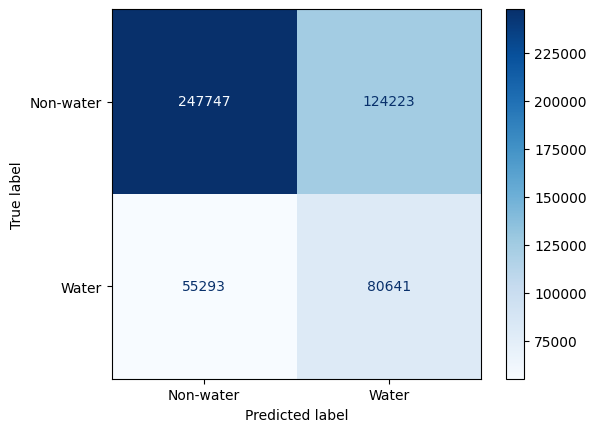

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true_flat, y_pred_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-water", "Water"])
disp.plot(cmap='Blues')


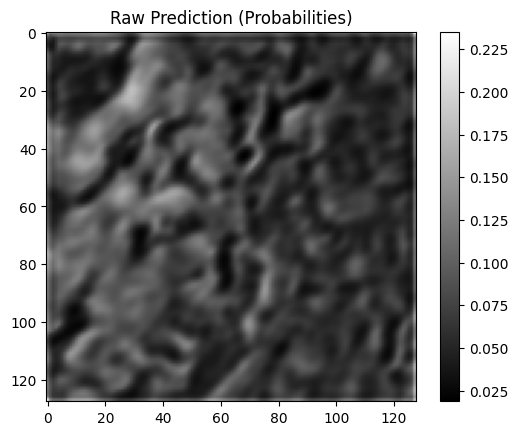

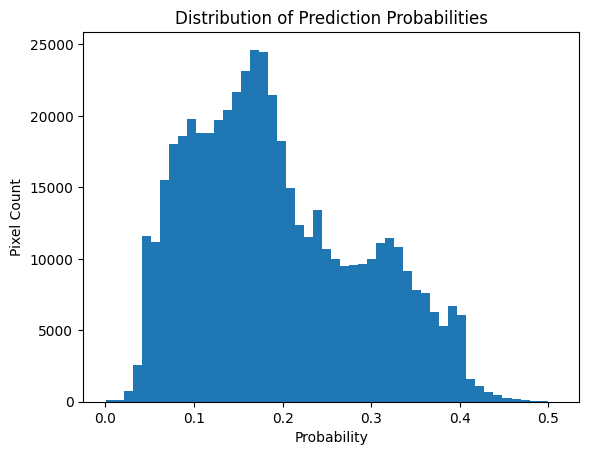

In [64]:
import matplotlib.pyplot as plt

# Visualize prediction probabilities (before threshold)
plt.imshow(y_pred[0].squeeze(), cmap='gray')
plt.title("Raw Prediction (Probabilities)")
plt.colorbar()
plt.show()

# Histogram of prediction values
plt.hist(y_pred.flatten(), bins=50)
plt.title("Distribution of Prediction Probabilities")
plt.xlabel("Probability")
plt.ylabel("Pixel Count")
plt.show()
